## Assignment 4 :Tests of correlation using the scipy package with citibike data. 

I will be testing the distribution of Citibike rider ages in two sets:
    

- male and female
    

- day and night

Using 3 tests: KS, Pearson's, and Spearman's.

The significance level for all 3 tests will be $\alpha = 0.05$.

In [1]:
# import relevant modules.
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In this study I'm using data from July 2015 which is a warm month and there are more riders so more data and less STATISTICAL NOISE.
### Data Download and Prep

In [2]:
if os.getenv("PUIDATA"):
    data_path = os.getenv("PUIDATA")
else:
    os.system('mkdir data')
    data_path = "./data"

In [3]:
# function definition from Dr.Bianco's code. 
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
            os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")
    else:
        print ("file in place, you can continue")

In [4]:
datestring = '201507'
getCitiBikeCSV(datestring)

('Downloading', '201507')
file in place, you can continue


In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [6]:
df.columns  

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [7]:
# Drop all rows where we do not have a birth year
df.dropna(inplace=True, subset=['birth year'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [8]:
# Drop all rows where gender is not defined
df = df[df['gender'] != 0]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


### By Gender
Splitting data by gender and extracting the age happens in the cell below.

In [9]:
# Generate age column
df['age'] = 2016 - df['birth year']

In [10]:
#df is the dataframe where the content of the csv file is stored. 
#Since only subscribers have data of age, therefore we will use the data by subscribers only.
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
df.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,ageM,ageF
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,46.0,45.0,NaN
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,32.0,31.0,NaN


In [11]:
# Convert starttime of trip to datetime data type to be able to work with it better
df["datetime"] = pd.to_datetime(df["starttime"], format="%m/%d/%Y %H:%M:%S")

In [12]:
# Generate age by day or night
df['ageDay'] = 2016 - df['birth year'][(df["datetime"].dt.hour >= 7) & (df["datetime"].dt.hour < 19)]
df['ageNight'] = 2016 - df['birth year'][(df["datetime"].dt.hour >= 19) | (df["datetime"].dt.hour < 7)]

In [13]:
# Generate day/night column
# 1 = day
# 2 - night
df.loc[(df["datetime"].dt.hour >= 7) & (df["datetime"].dt.hour < 19), 'time'] = 1
df.loc[(df["datetime"].dt.hour >= 19) | (df["datetime"].dt.hour < 7), 'time'] = 2

In [14]:
# Drop unneeded columns
df.drop(['tripduration',
         'starttime', 
         'stoptime', 
         'start station id', 
         'start station name', 
         'start station latitude',
         'start station longitude',
         'end station id', 
         'end station name', 
         'end station latitude',
         'end station longitude',
         'bikeid',
         'usertype'], axis=1, inplace=True)
df.head()

,birth year,gender,age,ageM,ageF,datetime,ageDay,ageNight,time
0,1970.0,1,46.0,45.0,NaN,2015-07-01 00:00:03,NaN,46.0,2.0
1,1984.0,1,32.0,31.0,NaN,2015-07-01 00:00:06,NaN,32.0,2.0
2,1992.0,1,24.0,23.0,NaN,2015-07-01 00:00:17,NaN,24.0,2.0
3,1990.0,1,26.0,25.0,NaN,2015-07-01 00:00:23,NaN,26.0,2.0
4,1988.0,1,28.0,27.0,NaN,2015-07-01 00:00:44,NaN,28.0,2.0


Note that the NaN values here are inserted as a result of categorical variable calcualted for the purpose of analysis. These NaN values are not from the original dataset.

### Data Exploration
#### Now I split age in 10 year bins. The dataset is very large, so it could be split in smaller bins.

In [15]:
pd.set_option('display.float_format', '{:.8g}'.format)
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,birth year,gender,age,ageM,ageF,ageDay,ageNight,time
count,904263,904263,904263,687252,217011,670098,234165,904263
mean,1976.6573,1.2399866,39.342671,38.767317,36.997862,39.946891,37.613606,1.2589567
std,11.402956,0.42707521,11.402956,11.452814,11.137304,11.510248,10.906805,0.43806205
min,1885,1,17,16,16,17,17,1
25%,1969,1,30,nan,nan,nan,nan,1
50%,1979,1,37,nan,nan,nan,nan,1
75%,1986,1,47,nan,nan,nan,nan,2
max,1999,2,131,130,89,117,131,2


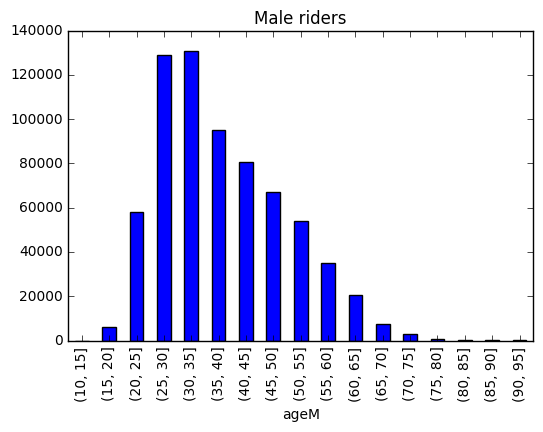

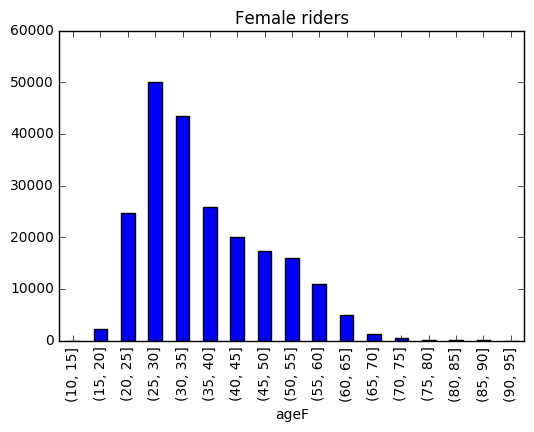

In [16]:
# set bins to be by 5 year increments between 10 and 99
bins = np.arange(10, 99, 5)
# Histogram of rider's age by gender
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar',legend=False)
axM.set_title("Male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',legend=False)
axF.set_title("Female riders")

### Figure 1: Histogram of rider's age by gender

Lets plot the rider's age by day and night time

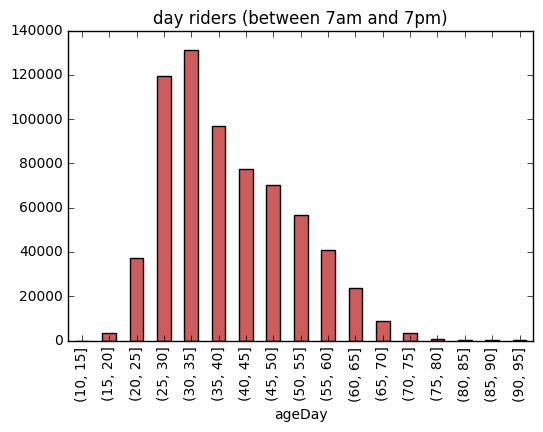

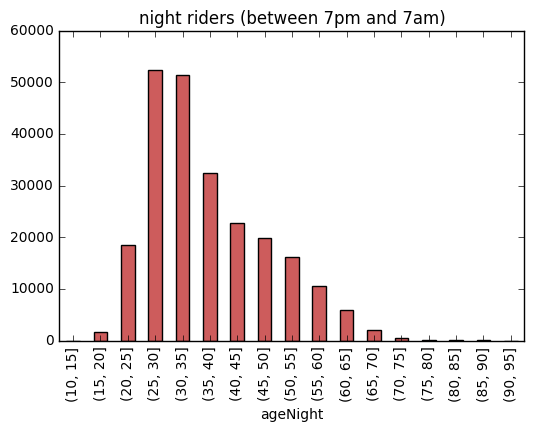

In [17]:
axDay = df.ageDay.groupby(pd.cut(df.ageDay, bins)).agg([np.count_nonzero]).plot(kind='bar', legend=False,color='indianred')
axDay.set_title("day riders (between 7am and 7pm)")

axNight = df.ageNight.groupby(pd.cut(df.ageNight, bins)).agg([np.count_nonzero]).plot(kind='bar', legend=False,color='indianred')
axNight.set_title("night riders (between 7pm and 7am)")

### Figure 2: Histogram of rider's age by Day and Night time 

          count_nonzero
ageM                   
(10, 15]              0
(15, 20]   0.0007529046
(20, 25]    0.030147692
(25, 30]    0.072902146
(30, 35]    0.083128586
(35, 40]    0.063430355
(40, 45]    0.038023243
(45, 50]    0.020374466
(50, 55]    0.015348202
(55, 60]    0.014435864
(60, 65]   0.0074410569
(65, 70]   0.0025064136
(70, 75]  7.8575378e-05
(75, 80]  0.00031526063
(80, 85]  3.8845047e-06
(85, 90]  4.3668758e-06
(90, 95]              0


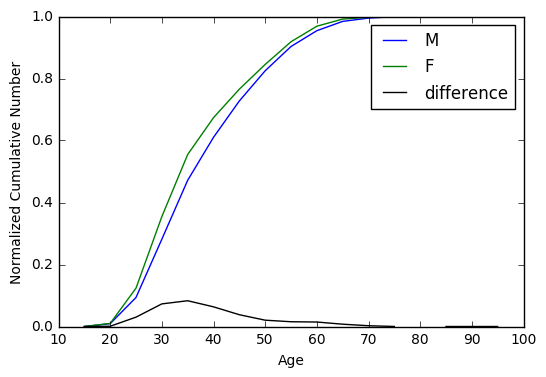

In [18]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([np.count_nonzero]).cumsum()
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([np.count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

plt.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
plt.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
plt.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")

plt.xlabel("Age")
plt.ylabel("Normalized Cumulative Number")
plt.legend()

### Figure 3: Cumulative distribution of Citibike riders' ages by gender

          count_nonzero
ageDay                 
(10, 15]              0
(15, 20]    0.001979327
(20, 25]    0.025006442
(25, 30]    0.070501314
(30, 35]    0.094072919
(35, 40]    0.088364721
(40, 45]    0.069549333
(45, 50]    0.049263319
(50, 55]    0.033475963
(55, 60]    0.017854375
(60, 65]   0.0077007806
(65, 70]   0.0030195617
(70, 75]  0.00069940734
(75, 80]  0.00010081134
(80, 85]  6.2225272e-07
(85, 90]  5.9713257e-06
(90, 95]              0


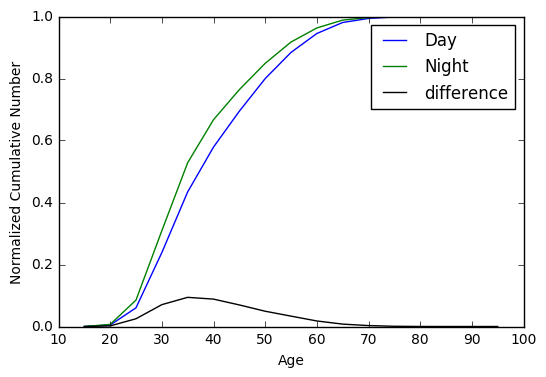

In [19]:
csDay=df.ageDay.groupby(pd.cut(df.ageDay, bins)).agg([np.count_nonzero]).cumsum()
csNight=df.ageNight.groupby(pd.cut(df.ageNight, bins)).agg([np.count_nonzero]).cumsum()

print (np.abs(csDay / csDay.max()-csNight / csNight.max()))

plt.plot(bins[:-1] + 5, csDay / csDay.max(), label = "Day")
plt.plot(bins[:-1] + 5, csNight / csNight.max(), label = "Night")
plt.plot(bins[:-1] + 5, np.sqrt(csNight / csNight.max() - csDay / csDay.max())**2, 'k-',
        label = "difference")

plt.xlabel("Age")
plt.ylabel("Normalized Cumulative Number")
plt.legend()

### Figure 4: Cumulative distribution of Citibike riders' ages by time of day

### KS Test
http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [21]:
import scipy.stats

In [22]:
ks_gender = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print "gender: ", ks_gender

gender:  Ks_2sampResult(statistic=0.11005115201581227, pvalue=0.0)


A '2-sample KS Test' like the one above checks to see if the 2 samples it is given are part of the same continuous distribution. The p-value it returns is a confidence level of whether or not it is possible to reject the Null hypothesis that both samples are part of the same distribution.

**In this case the p-value is 0, or close to 0 which is under our signifance level (in our case 0.05) 
Thus, we can confidently reject the Null hypothesis.**

### KS Test with subsample of data (1 ride every 200)

In [23]:
# Sample both ageM and ageF by a fraction of 1/200 and run the KS 2-sample test once again
ks_sample_gender = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)].sample(frac=0.005), df.ageF[~np.isnan(df.ageF)].sample(frac=0.005))
print (ks_sample_gender)

Ks_2sampResult(statistic=0.10571181794284405, pvalue=1.6896647786103315e-08)


### The Scipy-KS-Test returned a value that is very close to zero.
### Since the p-value is a lot below the 0.05 mark we can reject the Null Hypothesis ($H_0$)

## Pearson's test for correlation
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

As such, the Null hypothesis for these test can be stated as such:

$H_{gender}$: An uncorrelated dataset's Pearson correlation is at least as extreme as the Pearson correlation between a riders age and their gender.

$H_{time}$: An uncorrelated dataset's Pearson correlation is at least as extreme as the Pearson correlation between a riders age and the time of day they ride.

In [24]:
pt_gender = scipy.stats.pearsonr(df["age"], df["gender"])
print "gender:", pt_gender

gender: (-0.066271442714566725, 0.0)


Pearson's correlation coefficient between two variables is defined as the covariance of the two variables divided by the product of their standard deviations. 

## Spearman's test for correlation¶
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [27]:
sp_gender = scipy.stats.spearmanr(df["age"], df["gender"])
print "gender:", sp_gender

gender: SpearmanrResult(correlation=-0.071839170665815369, pvalue=0.0)


The Spearman correlation coefficient ranges from -1 to 1, with 0 indicating no significant correlation between the samples.
we get a very strong p-value under our $\alpha = 0.05$ so we can reject the Null hypothesis that an uncorrelated dataset would produce a similar correlation. Though the correlation is small, it exists.

## Extra Credit

In [29]:
# KS Test
ks_time = scipy.stats.ks_2samp(df.ageDay[~np.isnan(df.ageDay)], df.ageNight[~np.isnan(df.ageNight)])
print "time of day: ", ks_time

time of day:  Ks_2sampResult(statistic=0.11775972814719089, pvalue=0.0)


Based on the test we know the critical value of KS test is 0.1 and p value is 0. In this case, we reject the null hypothesis and conclude that the distribution of users age in daytime and night time are statistically different.

In [30]:
# Sub Sample of 1 ride for 200
ks_sample_time = scipy.stats.ks_2samp(df.ageDay[~np.isnan(df.ageDay)].sample(frac=0.005), df.ageNight[~np.isnan(df.ageNight)].sample(frac=0.005))
print "time of day:", ks_sample_time

time of day: Ks_2sampResult(statistic=0.1411858725161544, pvalue=1.4167714142816633e-15)


In [31]:
# Pearson's test for correlation
pt_time = scipy.stats.pearsonr(df["age"], df["time"])
print "time of day:", pt_time

time of day: (-0.089636746462690181, 0.0)


Based on the result, Pearson’s correlation coefficient is close to 0 or it is 0 (in this case its 0). Therefore we can reject the null hypothesis and conclude that the distribution of users age in daytime and night time are statistically different.

In [32]:
# Spearman Correlation 
sp_time = scipy.stats.spearmanr(df["age"], df["time"])
print "time of day:", sp_time

time of day: SpearmanrResult(correlation=-0.092995000592157984, pvalue=0.0)


Once again, we get a very strong p-value under our $\alpha = 0.05$ so we can reject the Null hypothesis that an uncorrelated dataset would produce a similar correlation. 

**Thus we can say that as the age of a rider increases, it is more likley that they are male and that they are willing to ride at night.**